# **1.SIMPLE LOGIC NETWORK USING MP NERON**

In [3]:
# AND Gate
x1 = [0,0,1,1]
x2 = [0,1,0,1]
w1 = [1,1,1,1]
w2 = [1,1,1,1]
t = 2
#output
print("x1   x2   w1   wt   t    O")
for i in range(len(x1)):
    if (x1[i]*w1[i] + x2[i]*w2[i]) >= t:
        print(x1[i],'  ',x2[i],'  ',w1[i],'  ',w2[i],'  ',t,'  ',1)
    else:
        print(x1[i],'  ',x2[i],'  ',w1[i],'  ',w2[i],'  ',t,'  ' ,0)


# OR Gate
x1 = [0,0,1,1]
x2 = [0,1,0,1]
w1 = [1,1,1,1]
w2 = [1,1,1,1]
t = 1
#output
print("x1   x2   w1   wt   t    O")
for i in range(len(x1)):
    if (x1[i]*w1[i] + x2[i]*w2[i]) >= t:
        print(x1[i],'  ',x2[i],'  ',w1[i],'  ',w2[i],'  ',t,'  ',1)
    else:
        print(x1[i],'  ',x2[i],'  ',w1[i],'  ',w2[i],'  ',t,'  ' ,0)

#XOR Gate
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
w1 = [1,-1,-1, 1]
w2 = [1,1,-1, -1]
t1=0
t2=1
#output
print(f"{'x1':<4} {'x2':<4} {'w1':<4} {'w2':<4} {'t1':<4} {'t2':<4} {'O':<2}")
for i in range(len(x1)):
    net1 = x1[i]*w1[i] + x2[i]*w2[i]
    o1 =  1 if net1 >= t1 else 0
    net2 = o1*w1[i] + (1-o1)*w2[i]
    o2 =   1 if net2 >= t2 else 0
    print(f"{x1[i]:<4} {x2[i]:<4} {w1[i]:<4} {w2[i]:<4} {t1:<4} {t2:<4} {o2:<2}")

#NOR Gate
x1 = [0,0,1,1]
x2 = [0,1,0,1]
w1 = [1,1,1,1]
w2 = [1,1,1,1]
t = -1
#output
print("x1   x2   w1   wt   t     O")
for i in range(len(x1)):
    if (x1[i]*w1[i] + x2[i]*w2[i]) >= t:
        print(x1[i],'  ',x2[i],'  ',w1[i],'  ',w2[i],'  ',t,'  ',1)
    else:
        print(x1[i],'  ',x2[i],'  ',w1[i],'  ',w2[i],'  ',t,'  ' ,0)



# **2.To implement simple linear regression with a single neuron model.**

# **3. Implement and Test MLP trained with back-propagation algorithms**

In [6]:
import numpy as np

X = np.array([[2, 9], [1, 5], [3, 6]], dtype=float)
y = np.array([[92], [86], [89]], dtype=float)
X = X / np.amax(X, axis=0)  # Maximum of X array longitudinally
y = y / 100

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

# Variable initialization
epoch = 7000  # Setting training iterations
lr = 0.1  # Setting learning rate
inputlayer_neurons = 2  # Number of features in dataset
hiddenlayer_neurons = 3  # Number of hidden layer neurons
output_neurons = 1  # Number of neurons at output layer

# Weight and bias initialization
wh = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
bh = np.random.uniform(size=(1, hiddenlayer_neurons))
wout = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))
bout = np.random.uniform(size=(1, output_neurons))

# Training algorithm
for i in range(epoch):
    # Forward Propagation
    hinp1 = np.dot(X, wh)
    hinp = hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1 = np.dot(hlayer_act, wout)
    outinp = outinp1 + bout
    output = sigmoid(outinp)

    # Backpropagation
    EO = y - output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    wout += hlayer_act.T.dot(d_output) * lr
    bout += np.sum(d_output, axis=0, keepdims=True) * lr
    wh += X.T.dot(d_hiddenlayer) * lr
    bh += np.sum(d_hiddenlayer, axis=0, keepdims=True) * lr

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n", output)

# **4.Implement and Test RBF network**

In [4]:
import numpy as np
from scipy.spatial.distance import cdist

# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.sin(X[:, 0]) + np.cos(X[:, 1])

# Define the radial basis function
def rbf(x, c, s):
    return np.exp(-np.linalg.norm(x-c)**2 / (2 * s**2))

# Choose centers using k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10).fit(X)
centers = kmeans.cluster_centers_

# Calculate the spread parameter
d_max = np.max(cdist(centers, centers, 'euclidean'))
sigma = d_max / np.sqrt(2 * len(centers))

# Compute the RBF layer output
R = np.zeros((X.shape[0], len(centers)))
for i in range(X.shape[0]):
    for j in range(len(centers)):
        R[i, j] = rbf(X[i], centers[j], sigma)

# Compute the output weights
W = np.dot(np.linalg.pinv(R), y)

# Define the RBF network prediction function
def rbf_network(X, centers, sigma, W):
    R = np.zeros((X.shape[0], len(centers)))
    for i in range(X.shape[0]):
        for j in range(len(centers)):
            R[i, j] = rbf(X[i], centers[j], sigma)
    return np.dot(R, W)

# Make predictions
y_pred = rbf_network(X, centers, sigma, W)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.031083658305225387


# **5.Implemnet SOFM for charecter recognition**

In [ ]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
len(x_train)
len(x_test)

x_train[0].shape
x_train[0]

plt.matshow(x_train[1])
y_train[2]

y_train[:5]

x_train = x_train / 255
x_test = x_test / 255

x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_train_flattened.shape

x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_test_flattened.shape

arr = np.around(x_train[0])

x_train_flattened[0]

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened, y_train, epochs=5)

#Model Evalution on Testing
model.evaluate(x_test_flattened, y_test)
plt.matshow(x_test[8])

y_pred = model.predict(x_test_flattened)
y_pred[0]

y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

y_test[:5]

np.argmax(y_pred[10])

conf_mat = tensorflow.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
conf_mat

import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Actual')
plt.xlabel('Predicted')

#Adding Dense Layers
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

#Model Evalution
model.evaluate(x_test_flattened, y_test)

conf_mat = tensorflow.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
conf_mat

import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Actual')
plt.xlabel('Predicted')

#Using Keras to Flatten the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)



# **6.Implement Fuzzy membership functions(Triangluar, trapezoidal, gbell, PI, Gemma,Gaussin )**

### MATLAB Code for Various Membership Functions

```matlab
% 8. PI MF
x = 0:0.1:10;
y = pimf(x, [1, 4, 5, 7]);
plot(x, y);
xlabel('PI MF, p = (x, [1, 4, 5, 7])');
ylabel('Fuzziness');

% 5. Bell MF
x = 0:0.1:10;
y = gbellmf(x, [1, 4, 7]);
plot(x, y);
xlabel('Bell MF, p = (x, [1, 4, 7])');
ylabel('Fuzziness');
ylim([-0.05 1.05]);

% 4. Gaussian 2 MF
x = 0:0.1:10;
y = gauss2mf(x, [1, 4, 5, 7]);
plot(x, y);
xlabel('Gaussian 2 MF, p = (x, [1, 4, 5, 7])');
ylabel('Fuzziness');
ylim([-0.05 1.05]);

% 3. Gaussian MF
x = 0:0.1:10;
y = gaussmf(x, [1, 4]);
plot(x, y);
xlabel('Gaussian MF, p = (x, [1, 4])');
ylabel('Fuzziness');
ylim([-0.05 1.05]);

% 1. Triangular MF
x = 0:10;
y = trimf(x, [3, 6, 10]);
plot(x, y);
xlabel('Triangular MF, p = (x, [3, 6, 10])');
ylabel('Fuzziness');
ylim([-0.05 1.05]);

% 7. Sigmoidal 2 MF
x = 0:0.1:10;
y = smf(x, [1, 4]);
plot(x, y);
xlabel('Sigmoidal MF, p = (x, [1, 4])');
ylabel('Fuzziness');
ylim([-0.05 1.05]);

% 6. Sigmoidal MF
x = 0:0.1:10;
y = sigmf(x, [1, 4]);
plot(x, y);
xlabel('Sigmoidal MF, p = (x, [1, 4])');
ylabel('Fuzziness');
ylim([-0.05 1.05]);

% 2. Trapezoidal MF
x = 0:10;
y = trapmf(x, [1, 4, 6, 9]);
plot(x, y);
xlabel('Trapezoidal MF, p = (x, [1, 4, 6, 9])');
ylabel('Fuzziness');
ylim([-0.05 1.05]);


# **7.Implement Defuzzification(Max-memebership principle, Centroi metho, Wighted avarage method)**

In [ ]:
#Matlab

h = readfis('mamdani.fis');
a=input('enter the type of clothes');
b=input('enter the type of dirt');
c=input('enter the type of detergent');
d=input('enter the quantity of clothes in kgs');
e=input('enter the water level in litres');

i=evalfis([a b c d e],h);
disp(['total washing time in minutes is:',num2str(i)])


In [ ]:
#machine.fis

[System]
Name='washing_machine'
Type='mamdani'
Version=2.0
NumInputs=5
NumOutputs=1
NumRules=20
AndMethod='min'
OrMethod='max'
ImpMethod='min'
AggMethod='max'
DefuzzMethod='centroid'

[Input1]
Name='clothes_type'
Range=[0 5]
NumMFs=5
MF1='very_delicate':'trimf',[0 1 2]
MF2='delicate':'trimf',[1 2 3]
MF3='medium':'trimf',[2 3 4]
MF4='strong':'trimf',[3 4 5]
MF5='very_strong':'trimf',[4 5 5]

[Input2]
Name='dirt_type'
Range=[0 5]
NumMFs=5
MF1='very_light':'trimf',[0 1 2]
MF2='light':'trimf',[1 2 3]
MF3='medium':'trimf',[2 3 4]
MF4='heavy':'trimf',[3 4 5]
MF5='very_heavy':'trimf',[4 5 5]

[Input3]
Name='detergent_type'
Range=[0 3]
NumMFs=3
MF1='mild':'trimf',[0 0 1.5]
MF2='medium':'trimf',[0 1.5 3]
MF3='strong':'trimf',[1.5 3 3]

[Input4]
Name='clothes_quantity'
Range=[0 8]
NumMFs=3
MF1='small':'trimf',[0 0 4]
MF2='medium':'trimf',[0 4 8]
MF3='large':'trimf',[4 8 8]

[Input5]
Name='water_level'
Range=[0 6]
NumMFs=3
MF1='low':'trimf',[0 0 3]
MF2='medium':'trimf',[0 3 6]
MF3='high':'trimf',[3 6 6]

[Output1]
Name='washing_time'
Range=[0 150]
NumMFs=5
MF1='very_short':'trimf',[0 30 60]
MF2='short':'trimf',[30 60 90]
MF3='medium':'trimf',[60 90 120]
MF4='long':'trimf',[90 120 150]
MF5='very_long':'trimf',[120 150 150]

[Rules]
1 1 1 1 1, 1 (1) : 1
1 1 1 1 2, 1 (1) : 1
1 2 1 1 2, 2 (1) : 1
2 2 1 1 2, 2 (1) : 1
2 3 2 2 2, 3 (1) : 1
3 3 2 2 2, 3 (1) : 1
3 4 2 2 2, 3 (1) : 1
4 4 3 2 2, 4 (1) : 1
4 5 3 3 3, 4 (1) : 1
5 5 3 3 3, 5 (1) : 1
1 3 2 2 2, 2 (1) : 1
2 4 2 2 2, 3 (1) : 1
3 5 3 2 2, 4 (1) : 1
4 3 2 3 3, 3 (1) : 1
5 4 3 3 3, 4 (1) : 1
3 2 1 2 2, 2 (1) : 1
4 3 2 2 3, 3 (1) : 1
5 4 3 3 2, 4 (1) : 1
2 5 3 2 2, 4 (1) : 1
1 4 2 1 2, 3 (1) : 1

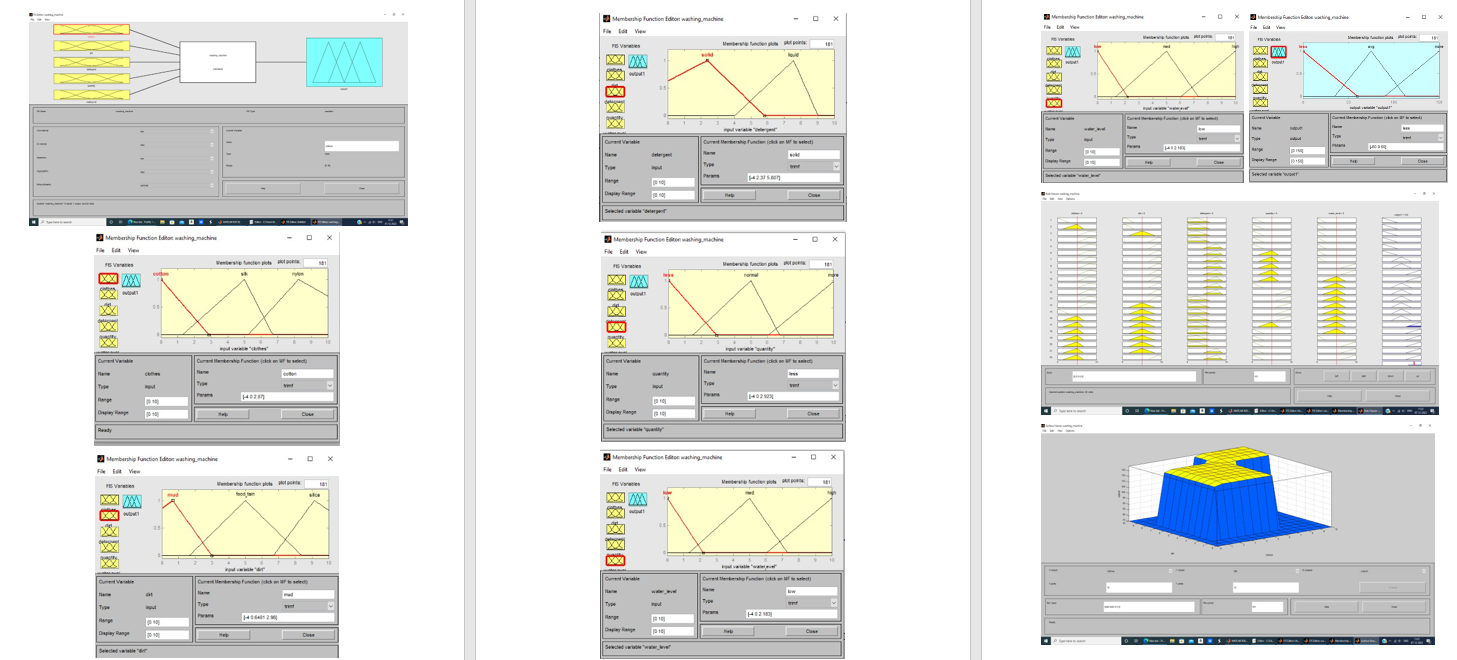

# **8.Implement FIS with Mamdani Inference mechanism**

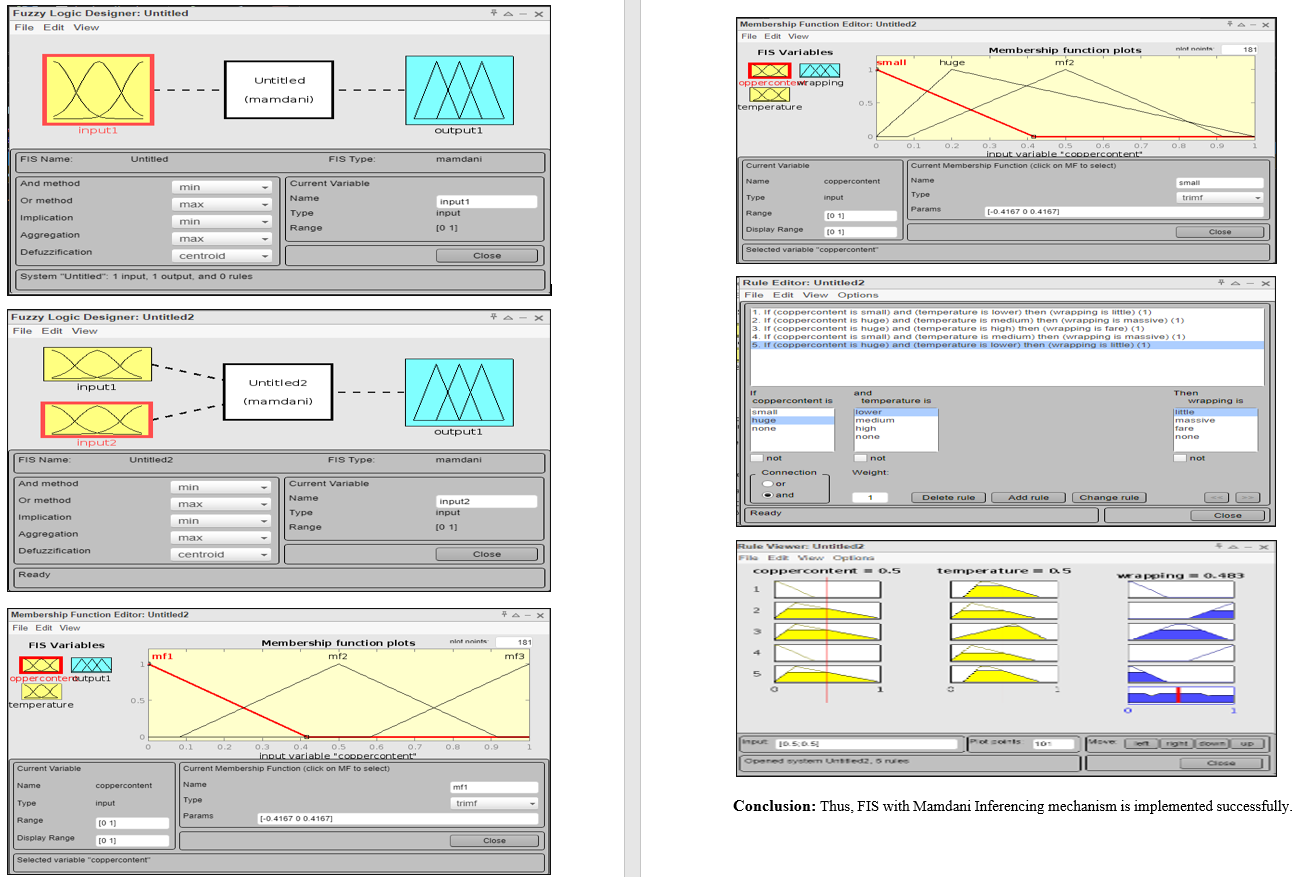